A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.


Business Goal 

 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model

In [2]:
#read the data
df=pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.shape

(1460, 81)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
#Visualising numeric variables
#sns.pairplot(df)
#plt.show()

In [7]:
df=df.drop(['Neighborhood','Condition1','Condition2','BldgType','OverallQual','PoolQC' ,'PavedDrive','GarageCond','GarageQual','GarageFinish',
         'GarageType','OverallCond','BsmtExposure','BsmtCond','BsmtQual','Exterior1st','ExterQual','ExterCond','RoofMatl','Exterior2nd',
           'Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu',
            'MasVnrType','ExterQual','SaleType','MiscFeature','Fence','BsmtFinType1','BsmtFinType2'], axis=1)


In [8]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan]).any(axis=1)
    return df[indices_to_keep].astype(np.float64)

## Cleaning

In [9]:

df['MSZoning'] = df['MSZoning'].map({1: 'C', 2: 'FV', 3: 'I', 4:'RH', 5:'RL', 6:'RP', 7:'RM'})
df['Street'] = df['Street'].map({1: 'Pave', 2: 'Grvl'})
df['Alley'] = df['Alley'].map({1: 'Pave', 2: 'Grvl', 3:'NA'})
df['LotShape'] = df['LotShape'].map({1: 'Reg', 2: 'IR1', 3:'IR2', 4: 'IR3'})
df['LandContour'] = df['LandContour'].map({1: 'Lvl', 2: 'Bnk', 3:'HLS', 4: 'Low'})       
df['Utilities'] = df['Utilities'].map({1: 'AllPub', 2: 'NoSewr', 3:'NoSeWa', 4: 'ELO'})
df['LotConfig'] = df['LotConfig'].map({1: 'Inside', 2: 'Corner', 3:'CulDSac', 4: 'FR2', 5: 'FR3'})    
df['LandSlope'] = df['LandSlope'].map({1: 'Gtl', 2: 'Mod', 3:'Sev'})
df['HouseStyle'] = df['HouseStyle'].map({1: '1Story', 2: '1.5Fin', 3:' 1.5Unf', 4: '2Story', 5: '2.5Fin', 6:' 2.5Unf',7:'SFoyer', 8:'SLvl'})
df['RoofStyle'] = df['RoofStyle'].map({1: 'Flat', 2: 'Gable', 3:'Gambrel', 4: 'Hip', 5: 'Mansard',6:'Shed'})    
df['SaleCondition'] = df['SaleCondition'].map({1: 'Normal', 2: 'Abnorml', 3:'AdjLand', 4: 'Alloca', 5: 'Family',6:'Partial'})    
df['Foundation'] = df['Foundation'].map({1: 'BrkTil', 2: 'CBlock', 3:'PConc', 4: 'Slab', 5: 'Stone',6:'Wood'})    

In [10]:
#df=clean_dataset(df)
#df.replace([np.inf, -np.inf], np.nan, inplace=True)


plt.figure(figsize=(30,20))

plt.subplot(2,3,1)
sns.boxplot(x='MSSubClass', y='SalePrice', data=df)

plt.subplot(2,3,2)
sns.boxplot(x='Street', y='SalePrice', data=df)

plt.subplot(2,3,3)
sns.boxplot(x='Alley', y='SalePrice', data=df)

plt.subplot(2,3,4)
sns.boxplot(x='LotShape', y='SalePrice', data=df)

plt.subplot(2,3,5)
sns.boxplot(x='LandContour', y='SalePrice', data=df)

plt.subplot(2,3,6)
sns.boxplot(x='Utilities', y='SalePrice', data=df)

plt.subplot(2,3,7)
sns.boxplot(x='LotConfig', y='SalePrice', data=df)

plt.subplot(2,3,8)
sns.boxplot(x='LandSlope', y='SalePrice', data=df)

plt.subplot(2,3,9)
sns.boxplot(x='Neighborhood', y='SalePrice', data=df)

plt.subplot(2,3,10)
sns.boxplot(x='Condition1', y='SalePrice', data=df)

plt.subplot(2,3,11)
sns.boxplot(x='Condition2', y='SalePrice', data=df)

plt.subplot(2,3,12)
sns.boxplot(x='BldgType', y='SalePrice', data=df)

plt.subplot(2,3,13)
sns.boxplot(x='HouseStyle', y='SalePrice', data=df)

plt.subplot(2,3,14)
sns.boxplot(x='RoofStyle', y='SalePrice', data=df)

plt.subplot(2,3,15)
sns.boxplot(x='RoofMatl', y='SalePrice', data=df)

plt.subplot(2,3,16)
sns.boxplot(x='Exterior1st', y='SalePrice', data=df)

plt.subplot(2,3,17)
sns.boxplot(x='Condition2', y='SalePrice', data=df)
plt.show()

## Splitting into train and test


In [11]:
df_train, df_test= train_test_split(df, train_size=0.7,random_state=100)
print(df.shape)
print(df.shape)

(1460, 48)
(1460, 48)


Rescaling the Features
As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that except for area, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

Min-Max scaling (Normalization) between 0 and 1
Standardisation (mean-0, sigma-1)
This time, we will use MinMax scaling.

In [12]:
#Normalization
#(x-xmin)/(xmax-xmin)

#Standaardization
# (x-mu)/sigma

# 1. Instantiate an object
scaler=MinMaxScaler()

num_vars=['MSSubClass', 'LotFrontage', 'LotArea']

# 2. Fit on data
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])
df_train.head()



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
318,319,0.235294,NaN,0.236301,0.039403,NaN,NaN,NaN,NaN,NaN,...,60,144,0,0,0,0,4,2009,NaN,260000
239,240,0.176471,NaN,0.106164,0.033981,NaN,NaN,NaN,NaN,NaN,...,140,0,0,0,0,0,4,2010,NaN,113000
986,987,0.176471,NaN,0.130137,0.017931,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,6,2006,NaN,117000
1416,1417,1.000000,NaN,0.133562,0.046139,NaN,NaN,NaN,NaN,NaN,...,0,114,0,0,0,0,4,2010,NaN,122500
390,391,0.176471,NaN,0.099315,0.032409,NaN,NaN,NaN,NaN,NaN,...,130,112,0,0,0,0,4,2008,NaN,119000


/var/folders/sh/pcr0sjw92h7_93_pf9fb5s8r0000gp/T/ipykernel_26264/1039516005.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(), annot=True, cmap="YlGnBu")


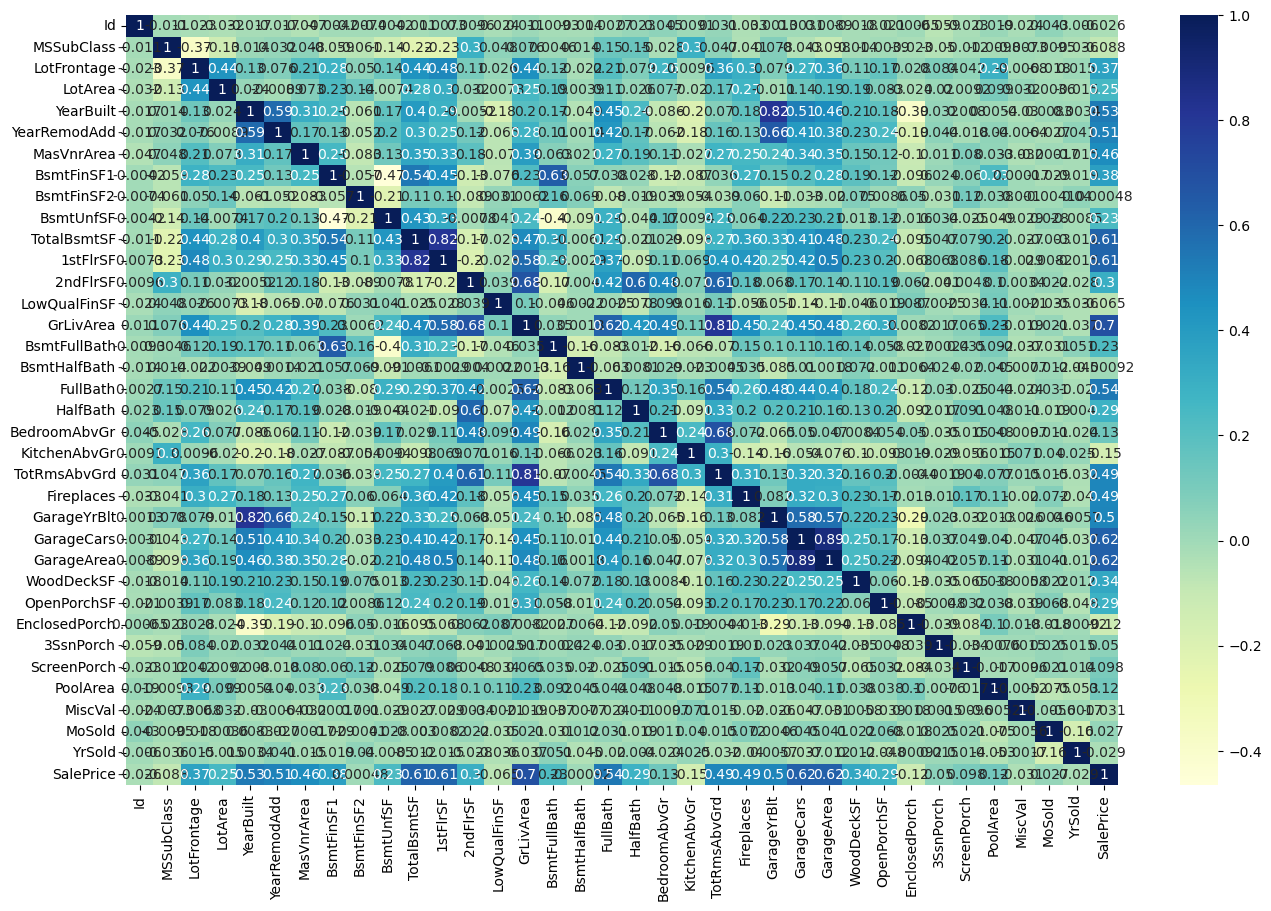

In [13]:
plt.figure(figsize=(16,10))
sns.heatmap(df_train.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [14]:
# X_train y train
y_train=df_train.pop("SalePrice")
X_train=df_train

In [15]:
X_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition
318,319,0.235294,NaN,0.236301,0.039403,NaN,NaN,NaN,NaN,NaN,...,340,60,144,0,0,0,0,4,2009,NaN
239,240,0.176471,NaN,0.106164,0.033981,NaN,NaN,NaN,NaN,NaN,...,0,140,0,0,0,0,0,4,2010,NaN
986,987,0.176471,NaN,0.130137,0.017931,NaN,NaN,NaN,NaN,NaN,...,394,0,0,0,0,0,0,6,2006,NaN
1416,1417,1.000000,NaN,0.133562,0.046139,NaN,NaN,NaN,NaN,NaN,...,0,0,114,0,0,0,0,4,2010,NaN
390,391,0.176471,NaN,0.099315,0.032409,NaN,NaN,NaN,NaN,NaN,...,0,130,112,0,0,0,0,4,2008,NaN


In [16]:
y_train.head()

318     260000
239     113000
986     117000
1416    122500
390     119000
Name: SalePrice, dtype: int64

In [17]:
X_train = X_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)


In [18]:
lm=LinearRegression()
lm.fit(X_train, y_train)

rfe=RFE(lm,step=10)
rfe=rfe.fit(X_train, y_train)
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Id', False, 3),
 ('MSSubClass', True, 1),
 ('MSZoning', False, 4),
 ('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('Street', False, 3),
 ('Alley', False, 3),
 ('LotShape', False, 4),
 ('LandContour', False, 4),
 ('Utilities', False, 4),
 ('LotConfig', False, 4),
 ('LandSlope', False, 4),
 ('HouseStyle', False, 4),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', True, 1),
 ('RoofStyle', False, 4),
 ('MasVnrArea', True, 1),
 ('Foundation', False, 4),
 ('BsmtFinSF1', False, 3),
 ('BsmtFinSF2', False, 3),
 ('BsmtUnfSF', False, 3),
 ('TotalBsmtSF', False, 3),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 2),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', True, 1),
 ('FullBath', True, 1),
 ('HalfBath', True, 1),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', True, 1),
 ('GarageYrBlt', False, 2),
 ('GarageCars', True, 1),
 ('GarageArea', False, 3),
 ('WoodDeckSF', False, 2),
 ('OpenPorchS

In [19]:
col = X_train.columns[rfe.support_]
col

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'ScreenPorch',
       'PoolArea', 'MoSold', 'YrSold'],
      dtype='object')

In [20]:
X_train.columns[~rfe.support_]

Index(['Id', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'HouseStyle', 'RoofStyle',
       'Foundation', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'LowQualFinSF', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'MiscVal', 'SaleCondition'],
      dtype='object')

In [21]:
### Building model using statsmodel, for the detailed statistics

In [22]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [23]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [24]:
y_train=y_train.values.reshape(-1,1)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [25]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     140.9
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          5.99e-294
Time:                        23:53:24   Log-Likelihood:                -12225.
No. Observations:                1021   AIC:                         2.450e+04
Df Residuals:                     997   BIC:                         2.462e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.655e+05   1.87e+06     -0.089   

In [26]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_rfe)

In [27]:
X_train_new = X_train_rfe.drop(["const"], axis = 1)

In [28]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
22,YrSold,17737.76
4,YearRemodAdd,16685.31
3,YearBuilt,11051.61
8,GrLivArea,1240.45
6,1stFlrSF,743.63
7,2ndFlrSF,149.55
15,TotRmsAbvGrd,86.59
14,KitchenAbvGr,35.52
13,BedroomAbvGr,29.70
11,FullBath,25.25


## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [29]:
y_train_cnt = lm.predict(X_train_lm)

In [30]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### Applying the scaling on the test sets

In [31]:
y_test = df.pop('SalePrice')
X_test = df
X_test = X_test.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)


In [32]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [33]:
# Making predictions
y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

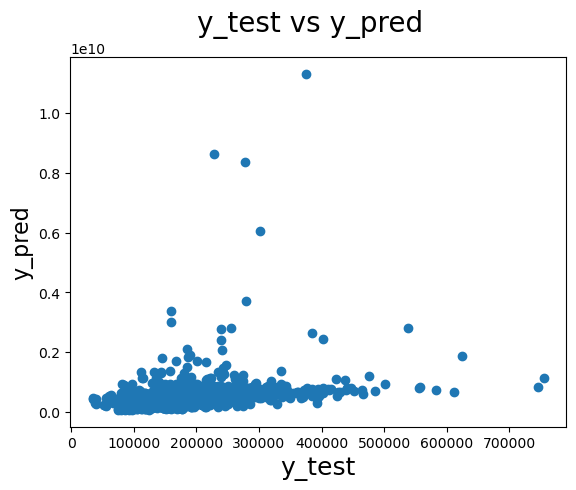

In [34]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [35]:
r2_score(y_true=y_test,y_pred=y_pred)


-91892064.99758413

In [36]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 10, 30, 100, 300, 500, 1000 ]}

In [37]:
# Applying Lasso
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 29 candidates, totalling 145 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 10, 30,
                                   100, 300, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [38]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007017,0.001347,0.002070,0.000301,0.0001,{'alpha': 0.0001},-22009.978137,-27013.687111,-25491.835189,-22383.858418,...,-24241.540424,1880.603603,29,-23802.567770,-20699.864536,-22490.633350,-23731.320808,-23407.456301,-22826.368553,1161.404661
1,0.004270,0.000343,0.001450,0.000088,0.001,{'alpha': 0.001},-22009.975124,-27013.687142,-25491.833584,-22383.857941,...,-24241.538256,1880.604166,28,-23802.566202,-20699.864974,-22490.632570,-23731.320102,-23407.452748,-22826.367319,1161.403816
2,0.003857,0.000285,0.001431,0.000156,0.01,{'alpha': 0.01},-22009.944991,-27013.687447,-25491.817532,-22383.853177,...,-24241.516571,1880.609804,27,-23802.550522,-20699.869355,-22490.624770,-23731.313035,-23407.417219,-22826.354980,1161.395370
3,0.004729,0.000677,0.001768,0.000183,0.05,{'alpha': 0.05},-22009.811068,-27013.688804,-25491.746189,-22383.832004,...,-24241.420197,1880.634863,26,-23802.480833,-20699.888827,-22490.590105,-23731.281626,-23407.259313,-22826.300141,1161.357835
4,0.004298,0.000471,0.001514,0.000153,0.1,{'alpha': 0.1},-22009.643662,-27013.690499,-25491.657010,-22383.805538,...,-24241.299728,1880.666192,25,-23802.393721,-20699.913166,-22490.546772,-23731.242366,-23407.061931,-22826.231591,1161.310917


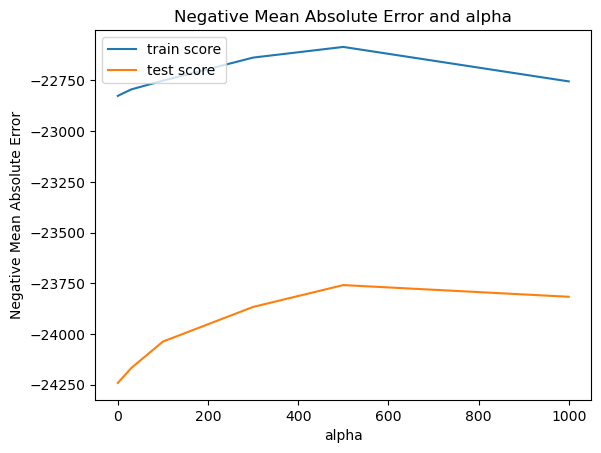

In [39]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [40]:
alpha = 50

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=50)

In [41]:
lasso.coef_

array([-2.17510949e+00, -2.54706738e+04,  0.00000000e+00,  0.00000000e+00,
        1.67932536e+04,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  3.99014124e+02,  4.25285077e+02,  0.00000000e+00,
        3.47499946e+01,  0.00000000e+00,  1.56900458e+01,  6.57503579e+00,
        1.24244968e+01,  6.86586326e+00,  5.32549606e+01,  5.87790052e+01,
        2.77989631e+00,  7.08718411e+00,  1.21331205e+04,  5.04298876e+03,
        6.04933490e+03, -3.58701000e+03, -1.02639749e+04, -3.17805357e+04,
        3.30888070e+03,  9.42266137e+03, -1.35875694e+01,  1.89030086e+04,
        7.41239937e+00,  2.70234644e+01, -1.13335544e+01,  2.45130039e+01,
        2.82305371e+01,  4.86464423e+01, -9.11692021e+01,  6.72299530e-01,
        1.48838205e+02, -7.16844734e+02,  0.00000000e+00])

In [ ]:
# Applying Ridge
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'neg_mean_absolute_error', cv = folds, return_train_score=True,verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 29 candidates, totalling 145 fits


In [ ]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

In [ ]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [ ]:
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_